In [57]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Phase2-project_11_database_IND.csv')

In [58]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [60]:
df.shape



(907, 27)

In [61]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(907, 27)

In [62]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# EDA
## 1. Null/NaN

In [63]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [64]:
columns_to_drop=["other_fuel1","other_fuel2","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","generation_gwh_2019","estimated_generation_gwh","generation_data_source"] 
 # It can be dropped as more than 50% is nan
df = df.drop(columns_to_drop, axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


In [65]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
owner                    565
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

In [66]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
owner                     object
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

In [67]:
df["latitude"]=df["latitude"].fillna((df["latitude"].median())) # Fill the nan values with median of latitude

In [68]:
df["longitude"]=df["longitude"].fillna((df["longitude"].median())) # Fill the nan values with median of longitude

In [69]:
df["commissioning_year"]=df["commissioning_year"].fillna((df["commissioning_year"].mode()[0])) # Fill the nan values with median of commissioning_year

In [70]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna((df["year_of_capacity_data"].mode()[0])) # Fill the nan values with median of year_of_capacity_data

In [71]:
df["owner"]=df["owner"].fillna(df["owner"].mode()[0]) # Fill the nan values with mode as it is an object

In [72]:
df["geolocation_source"]=df["geolocation_source"].fillna(df["geolocation_source"].mode()[0]) # Fill the nan values with mode as it is an object

In [73]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [74]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data']




In [75]:
df.nunique().to_frame("No of unique values")

,No of unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
owner,280


In [76]:
columns_to_drop=["name","gppd_idnr"]
df = df.drop(columns_to_drop, axis=1)

In [77]:
df.shape

(907, 12)

In [78]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(906, 12)

# 2. Label Encoder

In [79]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data
0,0.0,0.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2019.0
1,0.0,0.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2019.0
2,0.0,0.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2019.0
3,0.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0,2019.0
4,0.0,0.0,1800.0,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,1600.0,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0,2019.0
903,0.0,0.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2019.0
904,0.0,0.0,25.5,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0,2019.0
905,0.0,0.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2019.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                906 non-null    float64
 1   country_long           906 non-null    float64
 2   capacity_mw            906 non-null    float64
 3   latitude               906 non-null    float64
 4   longitude              906 non-null    float64
 5   primary_fuel           906 non-null    float64
 6   commissioning_year     906 non-null    float64
 7   owner                  906 non-null    float64
 8   source                 906 non-null    float64
 9   url                    906 non-null    float64
 10  geolocation_source     906 non-null    float64
 11  year_of_capacity_data  906 non-null    float64
dtypes: float64(12)
memory usage: 92.0 KB


# 3. Skewness, Outliars (We donot remove Skewness and Outliars from categorial columns)

In [81]:
df.describe()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data
count,906.0,906.0,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.0
mean,0.0,0.0,326.498119,21.216357,77.428135,3.206402,2004.646799,56.226269,43.871965,94.509934,1.732892,2019.0
std,0.0,0.0,590.353494,6.074678,4.817632,2.281902,15.663837,82.557160,44.661565,70.409649,0.677467,0.0
min,0.0,0.0,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,0.0,0.0,16.612500,17.065350,74.387550,1.000000,1998.000000,5.000000,22.000000,58.000000,2.000000,2019.0
50%,0.0,0.0,57.725000,21.780000,76.719500,3.000000,2014.000000,5.000000,22.000000,58.000000,2.000000,2019.0
75%,0.0,0.0,386.625000,25.172700,79.207350,6.000000,2015.000000,95.750000,29.750000,115.750000,2.000000,2019.0
max,0.0,0.0,4760.000000,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,2019.0


# Note : Observations:

- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "geolocation_source" --> Left Skewed
- Median (50%) < Mean - "capacity_mw","owner","source","url"-> Right Skewed
- Standard Dev for "capacity_mw,"owner","source","url"-> Outliars are present
- Percentile 75% and max :"capacity_mw","latitude","longitude","owner","source","url" -> outliars are presen, 

In [82]:
df.skew()

country                  0.000000
country_long             0.000000
capacity_mw              3.121463
latitude                -0.164321
longitude                1.162118
primary_fuel             0.471698
commissioning_year      -1.719271
owner                    1.362732
source                   1.825601
url                      1.508814
geolocation_source      -2.157970
year_of_capacity_data    0.000000
dtype: float64

In [83]:
# capacity_mw is skewed

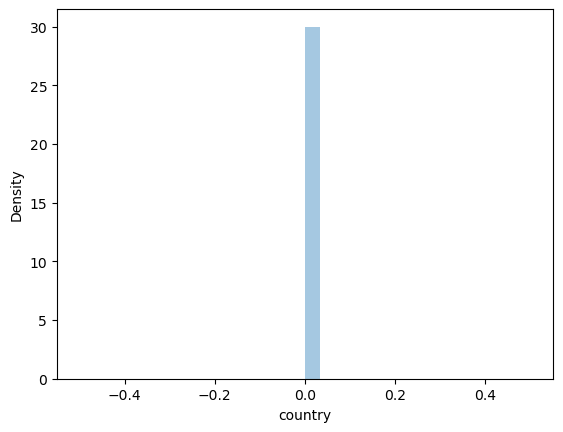

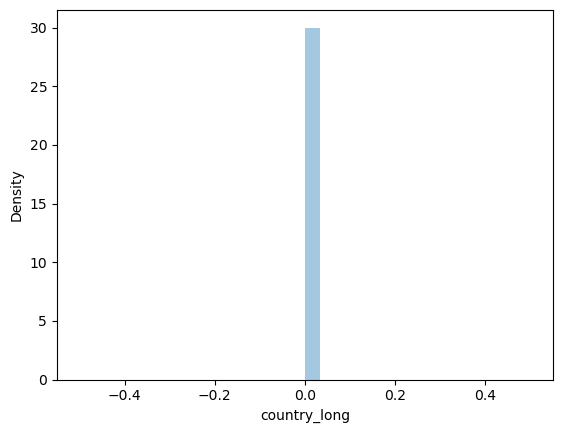

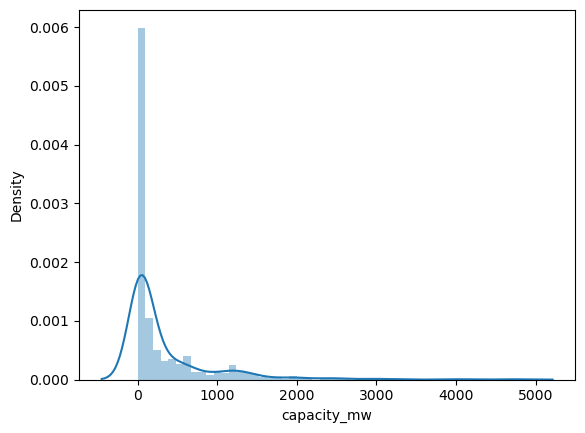

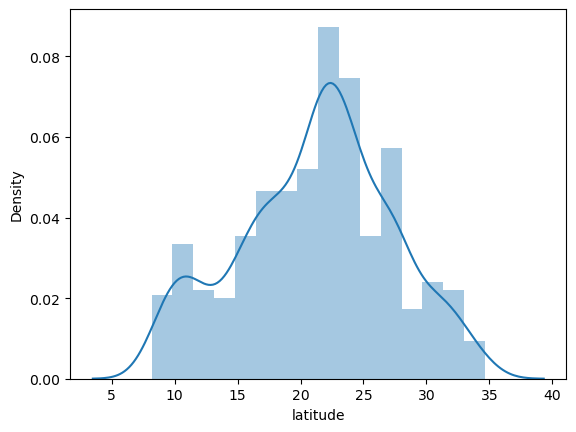

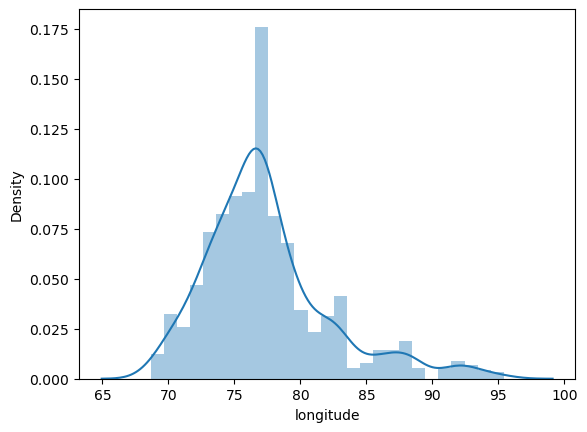

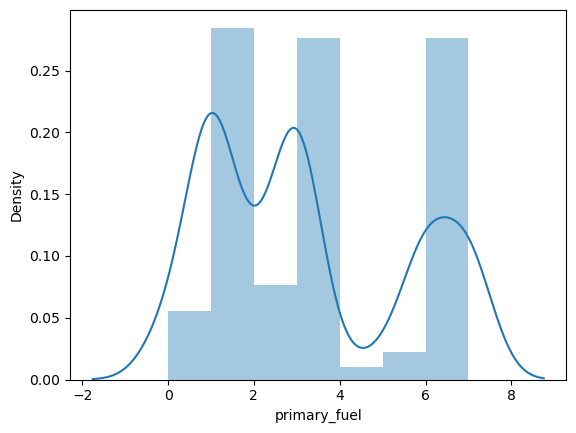

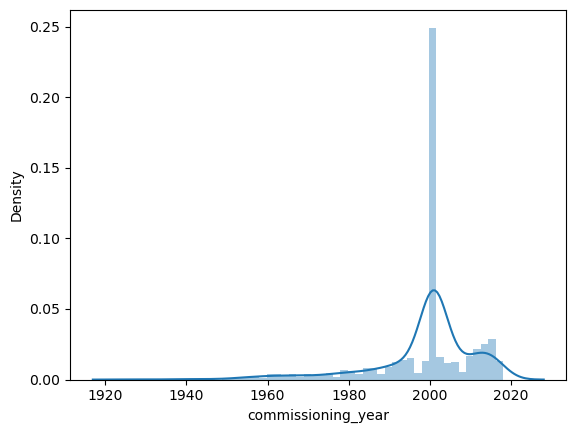

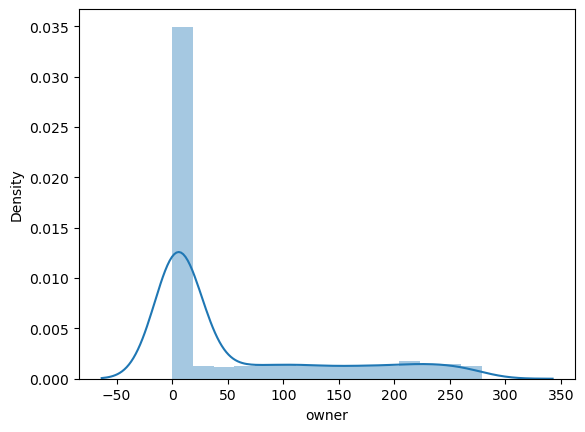

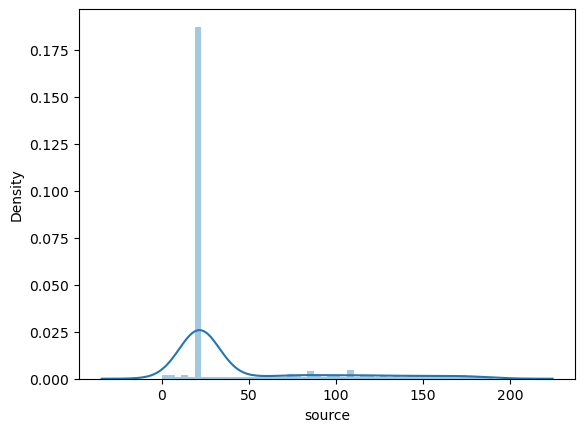

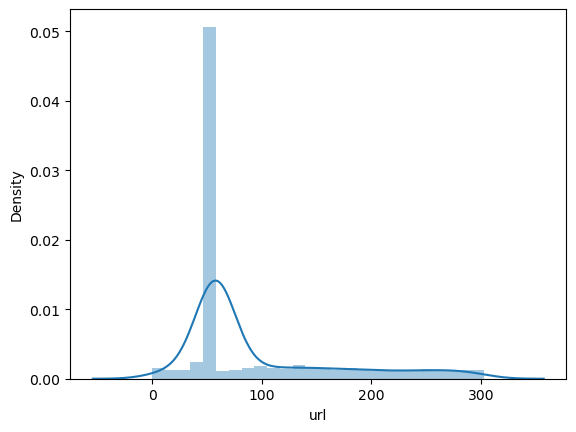

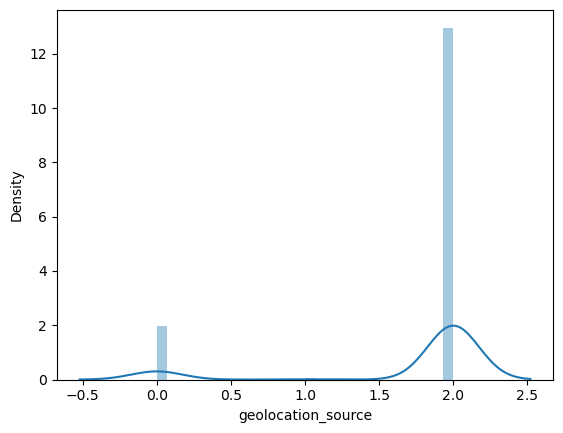

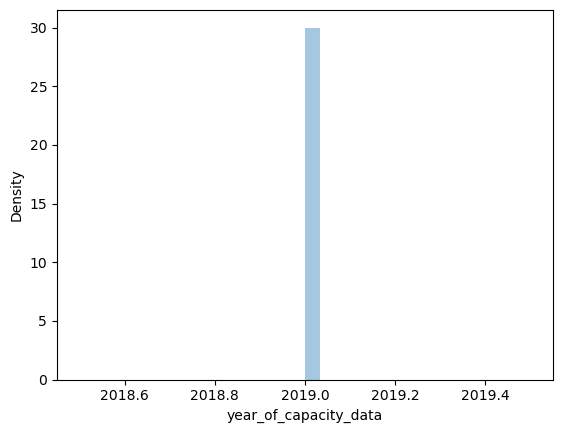

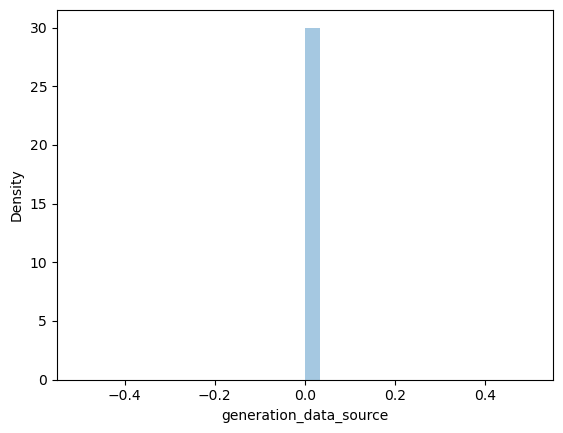

In [101]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

In [84]:
x= ['capacity_mw']
for i in x:
    df[i]=np.cbrt(df[i])
df.skew()

country                  0.000000
country_long             0.000000
capacity_mw              1.012143
latitude                -0.164321
longitude                1.162118
primary_fuel             0.471698
commissioning_year      -1.719271
owner                    1.362732
source                   1.825601
url                      1.508814
geolocation_source      -2.157970
year_of_capacity_data    0.000000
dtype: float64

In [85]:
df.nunique().to_frame("No of unique values")

,No of unique values
country,1
country_long,1
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
owner,280
source,191
url,304


country                     Axes(0.125,0.825775;0.168478x0.0542254)
country_long             Axes(0.327174,0.825775;0.168478x0.0542254)
capacity_mw              Axes(0.529348,0.825775;0.168478x0.0542254)
latitude                 Axes(0.731522,0.825775;0.168478x0.0542254)
longitude                   Axes(0.125,0.760704;0.168478x0.0542254)
primary_fuel             Axes(0.327174,0.760704;0.168478x0.0542254)
commissioning_year       Axes(0.529348,0.760704;0.168478x0.0542254)
owner                    Axes(0.731522,0.760704;0.168478x0.0542254)
source                      Axes(0.125,0.695634;0.168478x0.0542254)
url                      Axes(0.327174,0.695634;0.168478x0.0542254)
geolocation_source       Axes(0.529348,0.695634;0.168478x0.0542254)
year_of_capacity_data    Axes(0.731522,0.695634;0.168478x0.0542254)
dtype: object

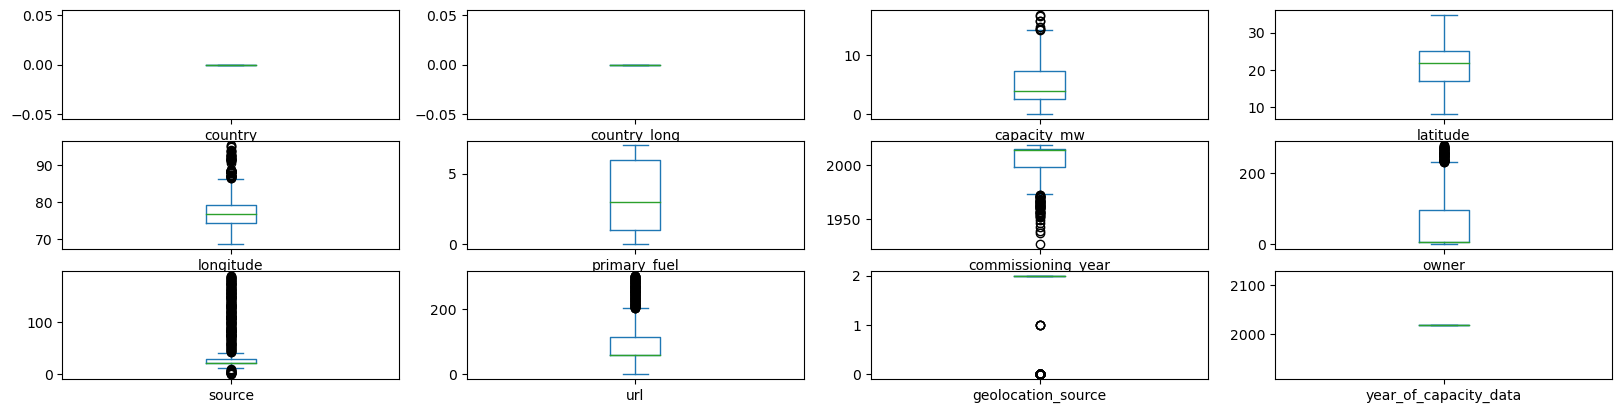

In [86]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

In [87]:
from scipy.stats import zscore
ol = ["capacity_mw","longitude","commissioning_year"]
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss rate 1.8763796909492272


# 4. Co- Relation and Multicolinearity

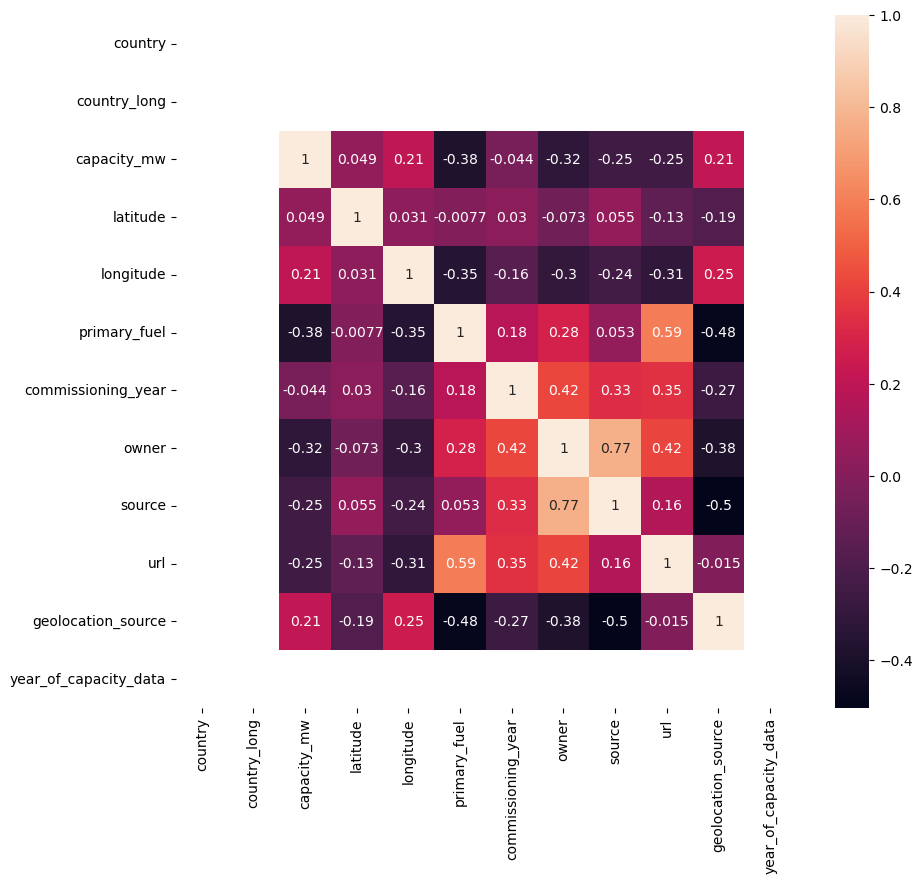

In [46]:
corr_hmap=df1.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - "source","Comm_year","latitude"
- 0.3 or >-0.3 --> geolocation _Sourve", "owner","longitude","cap mw"
- 0.5 or >-0.5 --> Mod Corelation - "Source","url"
- 0.7 or >-0.7 --> High Corelation

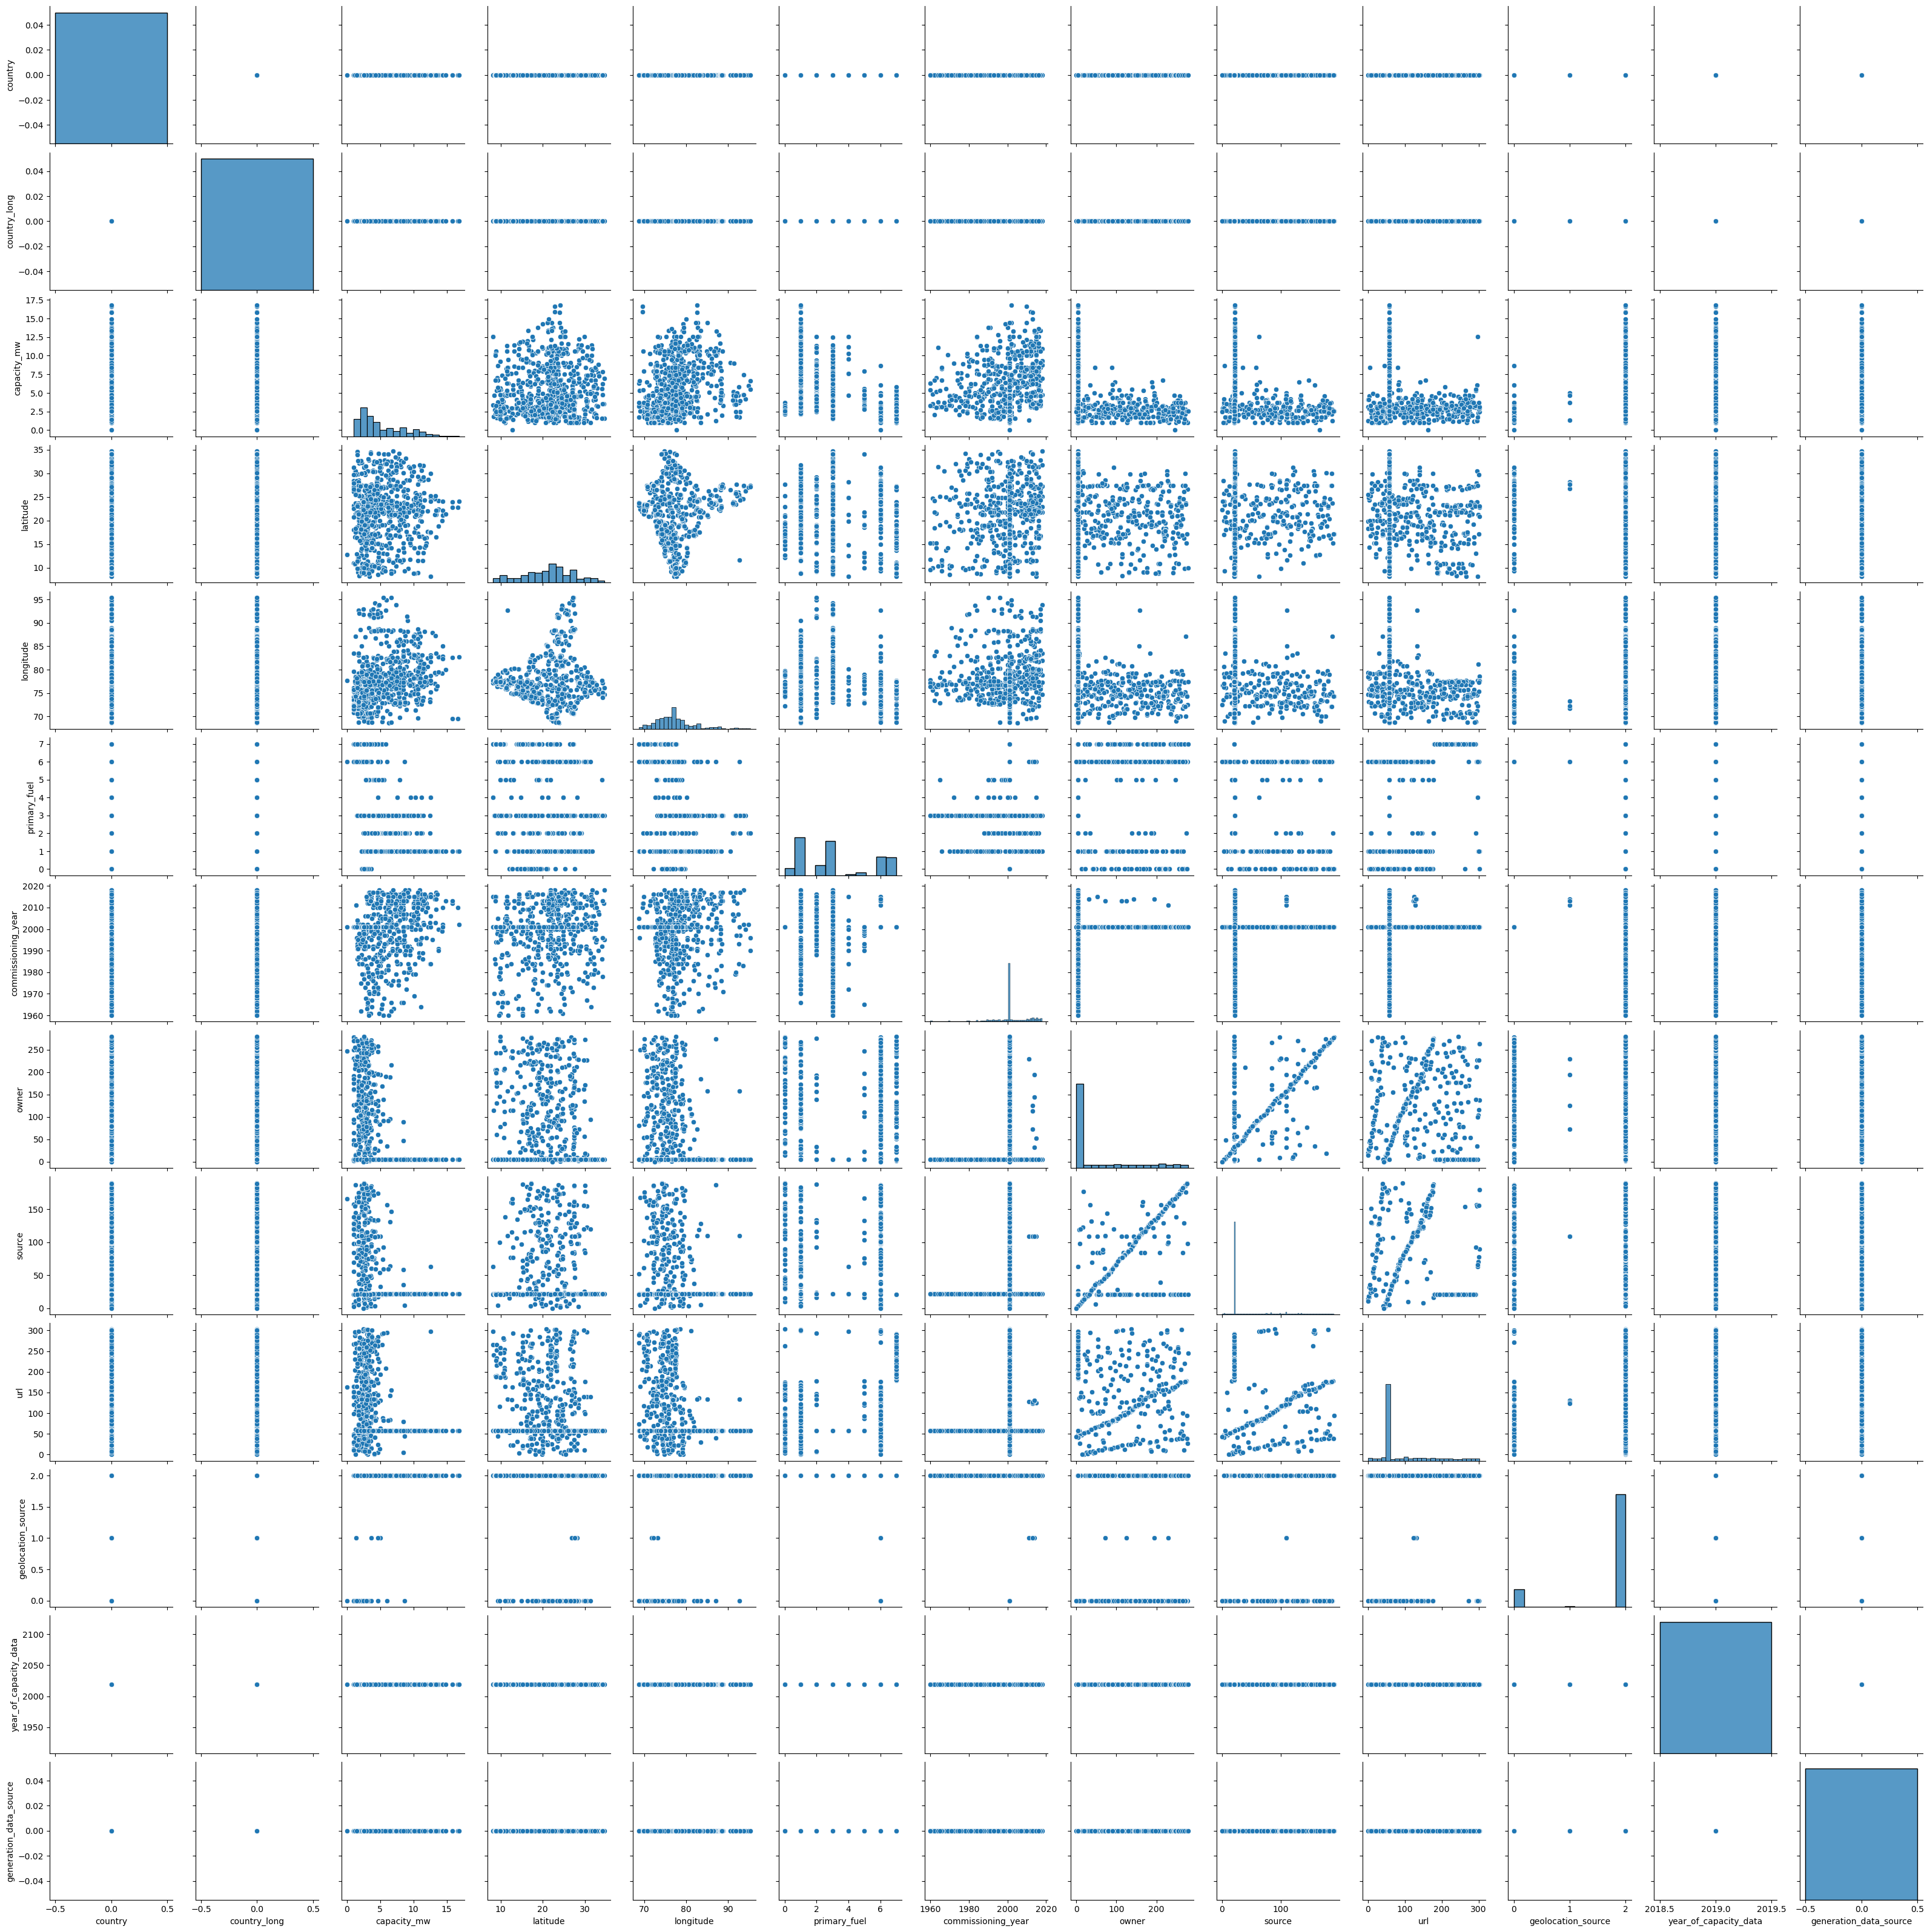

In [112]:
sns.pairplot(df1)

In [47]:
df1.columns

Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data'],
      dtype='object')

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data']
x = df1[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

      VIF Factor               features
0            NaN                country
1            NaN           country_long
2       1.191786            capacity_mw
3       1.081724               latitude
4       1.203104              longitude
5       1.358496     commissioning_year
6       3.340936                  owner
7       2.987994                 source
8       1.537154                    url
9       1.501377     geolocation_source
10  28801.988314  year_of_capacity_data


In [49]:
columns_to_drop=["year_of_capacity_data"] 
df2 = df1.drop(columns_to_drop, axis=1)
df2

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source
0,0.0,0.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0
1,0.0,0.0,98.0,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0
2,0.0,0.0,39.2,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0
3,0.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0
4,0.0,0.0,1800.0,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,1600.0,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0
903,0.0,0.0,3.0,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0
904,0.0,0.0,25.5,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0
905,0.0,0.0,80.0,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0


# MODEL

# 1. Feature Scaling using Standard Scalarization

In [50]:
y=df1["primary_fuel"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,country,country_long,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data
0,0.0,0.0,-0.554467,1.150914,-0.862513,0.385052,2.070078,1.439335,0.462788,-1.066322,0.0
1,0.0,0.0,-0.393765,0.585362,-0.578226,0.675454,2.419521,2.885125,1.097866,0.398841,0.0
2,0.0,0.0,-0.492710,0.111669,-1.666052,0.675454,-0.665217,-0.518043,1.549478,0.398841,0.0
3,0.0,0.0,-0.331503,0.437239,2.902120,-0.123151,-0.629068,-0.495800,-0.525113,0.398841,0.0
4,0.0,0.0,2.470269,0.121019,1.042377,0.675454,-0.629068,-0.495800,-0.525113,0.398841,0.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.0,2.133720,-0.816505,-0.007324,0.748055,-0.629068,-0.495800,-0.525113,0.398841,0.0
885,0.0,0.0,-0.553626,-1.379426,0.160677,0.675454,0.684356,0.727561,-1.033176,-2.531485,0.0
886,0.0,0.0,-0.515764,-0.985148,-0.376255,0.675454,-0.629068,-0.518043,2.325685,0.398841,0.0
887,0.0,0.0,-0.424054,0.516472,-0.757175,0.675454,0.407211,0.327189,-0.186404,0.398841,0.0


# 2. OverSampling

In [51]:
y.value_counts()

primary_fuel
1.0    258
3.0    233
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: count, dtype: int64

In [52]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [53]:
y1.value_counts()

primary_fuel
6.0    258
1.0    258
7.0    258
2.0    258
3.0    258
0.0    258
5.0    258
4.0    258
Name: count, dtype: int64

# 3. Best random state value:

In [33]:
y1.unique() # Will apply classification model

array([6., 1., 7., 2., 3., 0., 5., 4.])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.9354838709677419  at random state  56


# 4. Creating train test split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.932258064516129
[[71  0  0  0  0  0  0  0]
 [ 7 51  5  5  3  2  0  0]
 [ 2  2 63  0  1  1  0  0]
 [ 0  1  7 64  2  1  0  0]
 [ 0  1  0  0 86  1  0  0]
 [ 0  0  1  0  0 90  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        71
         1.0       0.93      0.70      0.80        73
         2.0       0.83      0.91      0.87        69
         3.0       0.93      0.85      0.89        75
         4.0       0.93      0.98      0.96        88
         5.0       0.95      0.99      0.97        91
         6.0       1.00      1.00      1.00        72
         7.0       1.00      1.00      1.00        81

    accuracy                           0.93       620
   macro avg       0.93      0.93      0.93       620
weighted avg       0.93      0.93      0.93       620



Cross Validation of:   RandomForestClassifier()  is 
[0.90314

Cross Validation of:   KNeighborsClassifier()  is 
[0.89588378 0.84503632 0.86924939 0.8716707  0.87135922]
0.8706398834011143
Diff in Acc Score and Cross Val Score is -  -0.004510851143049832


Accuracy Score of:   DecisionTreeClassifier()  is 
0.8725806451612903
[[68  2  1  0  0  0  0  0]
 [ 3 51 10  6  1  2  0  0]
 [ 1  6 56  2  0  3  1  0]
 [ 0  2  9 55  0  9  0  0]
 [ 0  2  7  5 74  0  0  0]
 [ 0  1  2  3  1 84  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        71
         1.0       0.80      0.70      0.74        73
         2.0       0.66      0.81      0.73        69
         3.0       0.77      0.73      0.75        75
         4.0       0.97      0.84      0.90        88
         5.0       0.86      0.92      0.89        91
         6.0       0.99      1.00      0.99        72
         7.0       1.00      1.00      1.00        81

    accuracy                  

# Best Model is : RandomForestClassifier and ExtraTreesClassifier

# 6. Hyper Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [38]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [39]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [40]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [41]:
RFC_final = ExtraTreesClassifier(
  bootstrap =  False,
  max_depth = 30,
  min_samples_leaf = 1,
  min_samples_split =  5,
  n_estimators =  50,
  random_state=maxRS )
RFC_final.fit(x_train,y_train)
pred=RFC_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.2258064516129


# 7. Saving the Model

In [42]:
import joblib # save as *.pkl
joblib.dump(RFC_final,"Pr_11_database_IND_Project.pkl")

['Pr_11_database_IND_Project.pkl']

# Project2: Capacity_mw

In [88]:
from scipy.stats import zscore
ol = ["capacity_mw","longitude","commissioning_year"]
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df3 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss rate 1.8763796909492272


In [89]:
df3

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data
0,0.0,0.0,1.357209,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0,2019.0
1,0.0,0.0,4.610436,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0,2019.0
2,0.0,0.0,3.396999,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0,2019.0
3,0.0,0.0,5.129928,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0,2019.0
4,0.0,0.0,12.164404,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,11.696071,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0,2019.0
903,0.0,0.0,1.442250,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0,2019.0
904,0.0,0.0,2.943383,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0,2019.0
905,0.0,0.0,4.308869,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0,2019.0


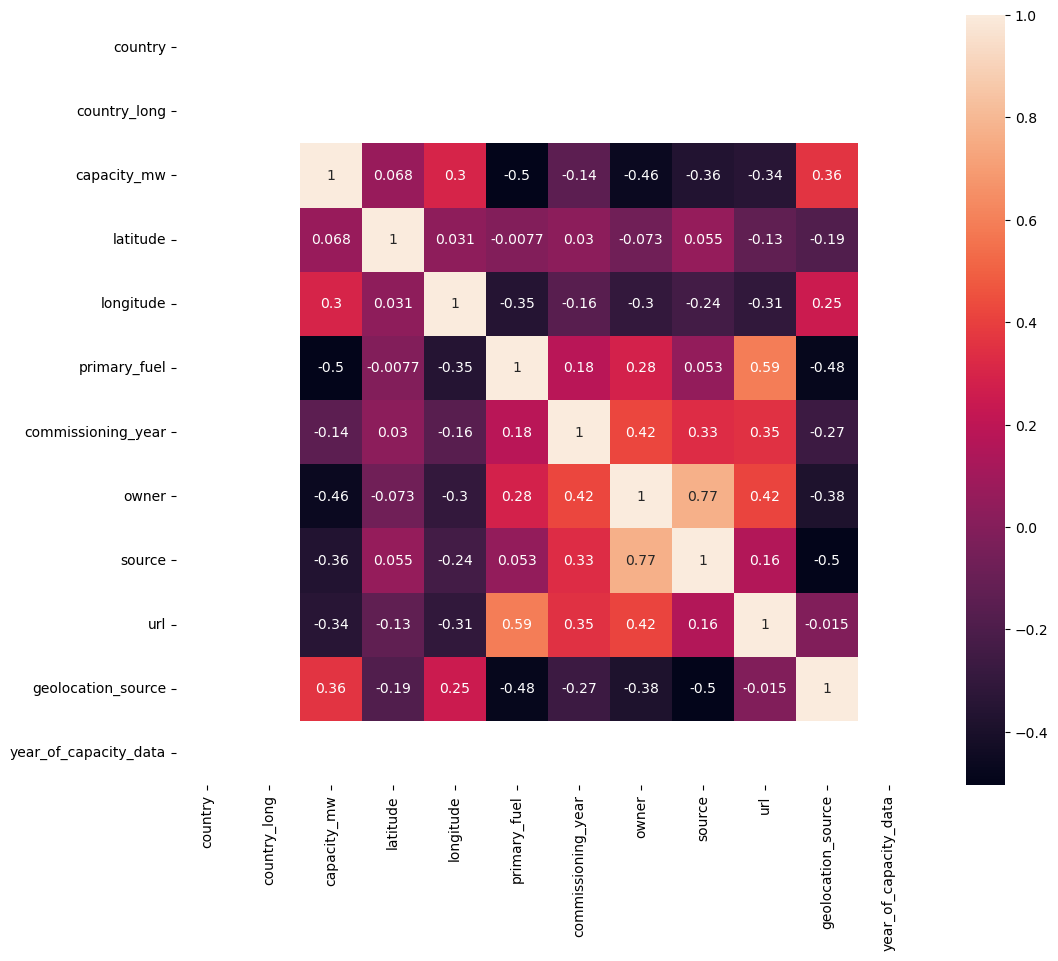

In [91]:
corr_hmap=df3.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

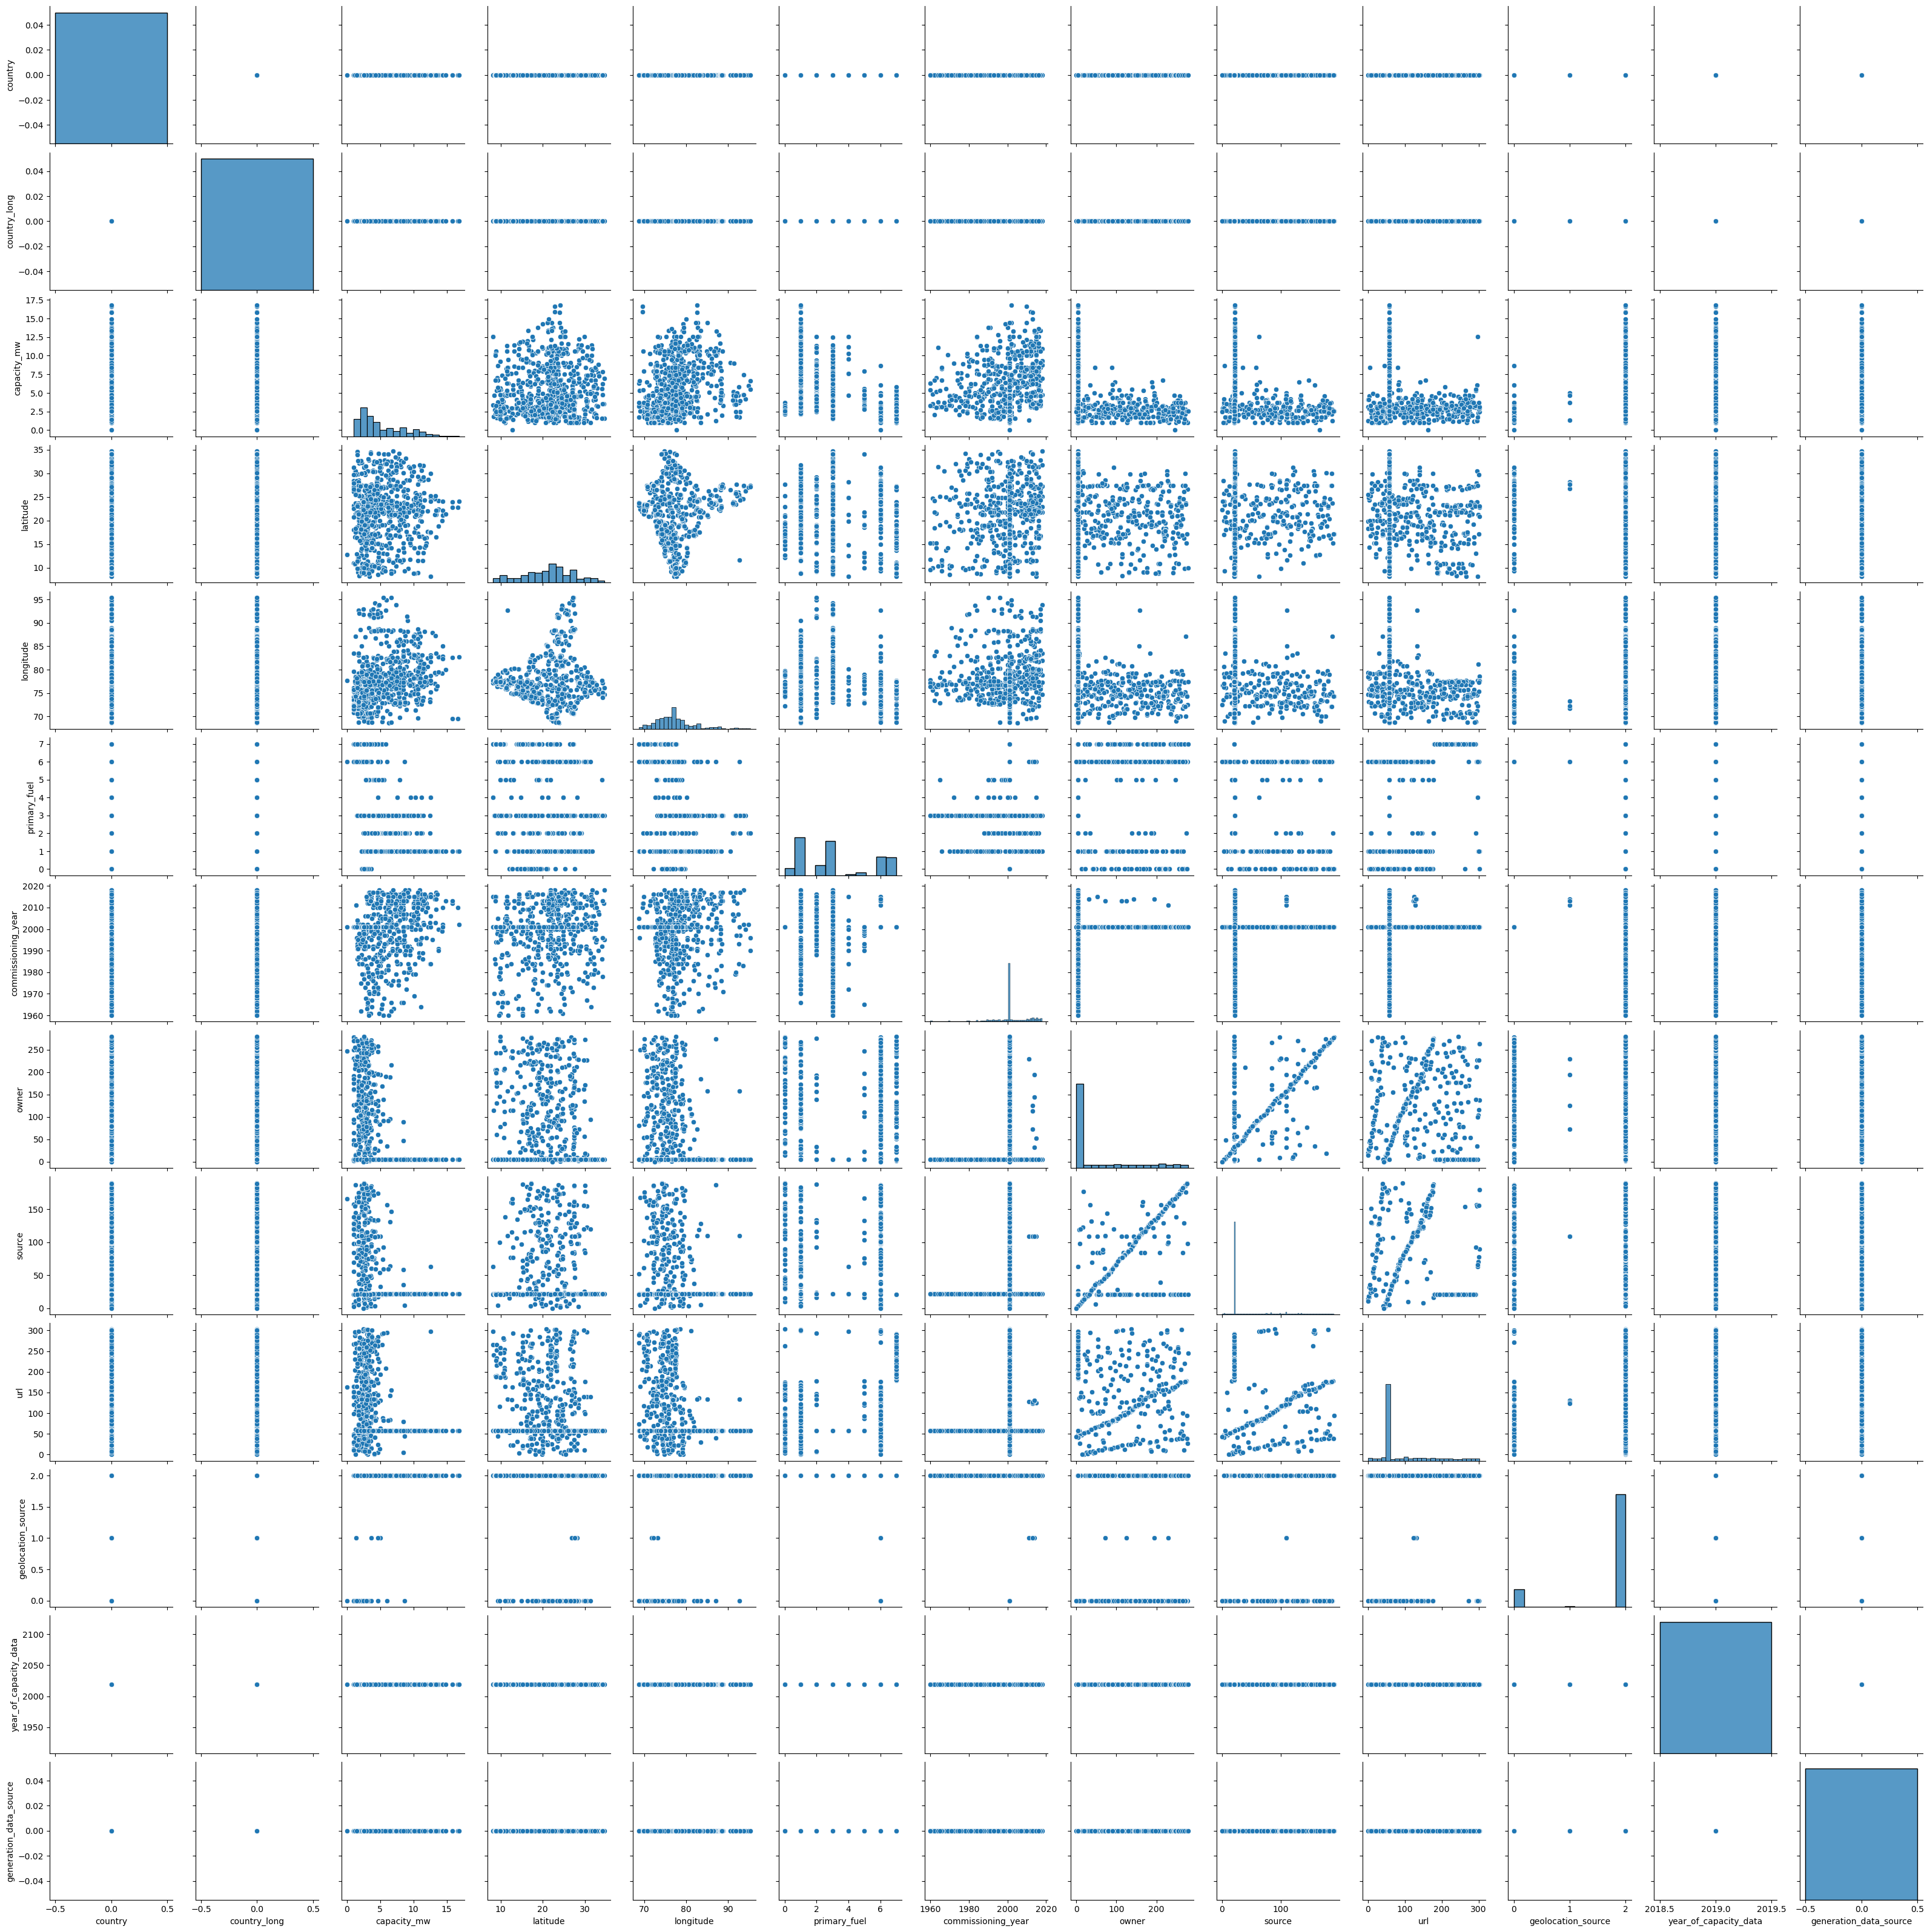

In [152]:
sns.pairplot(df3)

In [92]:
df3.columns

Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data'],
      dtype='object')

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['country', 'country_long','latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data']
x = df3[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

      VIF Factor               features
0            NaN                country
1            NaN           country_long
2       1.080744               latitude
3       1.223827              longitude
4       3.473595           primary_fuel
5       1.389759     commissioning_year
6       3.423543                  owner
7       3.876925                 source
8       2.735421                    url
9       3.028178     geolocation_source
10  30053.910715  year_of_capacity_data


In [94]:
columns_to_drop=["year_of_capacity_data"] 
df4 = df3.drop(columns_to_drop, axis=1)
df4

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source
0,0.0,0.0,1.357209,28.1839,73.2407,6.0,2011.0,229.0,109.0,128.0,1.0
1,0.0,0.0,4.610436,24.7663,74.6090,1.0,2015.0,258.0,174.0,173.0,2.0
2,0.0,0.0,3.396999,21.9038,69.3732,7.0,2015.0,2.0,21.0,205.0,2.0
3,0.0,0.0,5.129928,23.8712,91.3602,2.0,2004.0,5.0,22.0,58.0,2.0
4,0.0,0.0,12.164404,21.9603,82.4091,1.0,2015.0,5.0,22.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,11.696071,16.2949,77.3568,1.0,2016.0,5.0,22.0,58.0,2.0
903,0.0,0.0,1.442250,12.8932,78.1654,6.0,2015.0,114.0,77.0,22.0,0.0
904,0.0,0.0,2.943383,15.2758,75.5811,7.0,2015.0,5.0,21.0,260.0,2.0
905,0.0,0.0,4.308869,24.3500,73.7477,1.0,2015.0,91.0,59.0,82.0,2.0


# MODEL

1. Feature Scaling using Standard Scalarization

In [96]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
y=df4["capacity_mw"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# 2. Best random state value:

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.4433243086448665  at random state  75


# 3. Creating train test split

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# 4. Regression Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  0.4433243086448665
R2_score_Training Data:   LinearRegression()  is  37.248991885628
error:
Mean Absolute error 1.8428242592213167
Mean Squared error 5.738855237850935
Root Mean Squared error 2.395590790984749


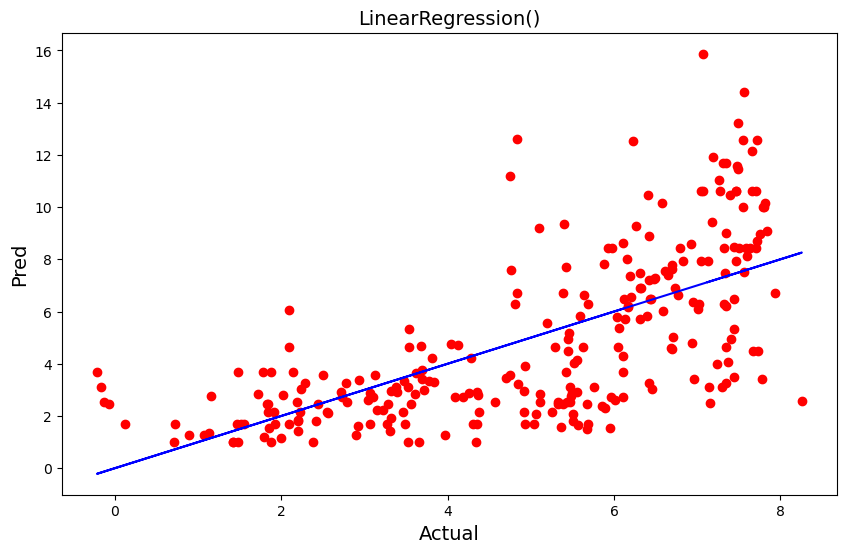

Cross Validation of:   LinearRegression()  is 
[0.35211317 0.34779805 0.3354622  0.38610972 0.4270233 ]
0.3697012902552329
Diff in Acc Score and Cross Val Score is -  7.362301838963359


R2_score:   RandomForestRegressor()  is  0.670530586955845
R2_score_Training Data:   RandomForestRegressor()  is  95.10489719077711
error:
Mean Absolute error 1.3468405934444547
Mean Squared error 3.3965508034980694
Root Mean Squared error 1.842973359410838


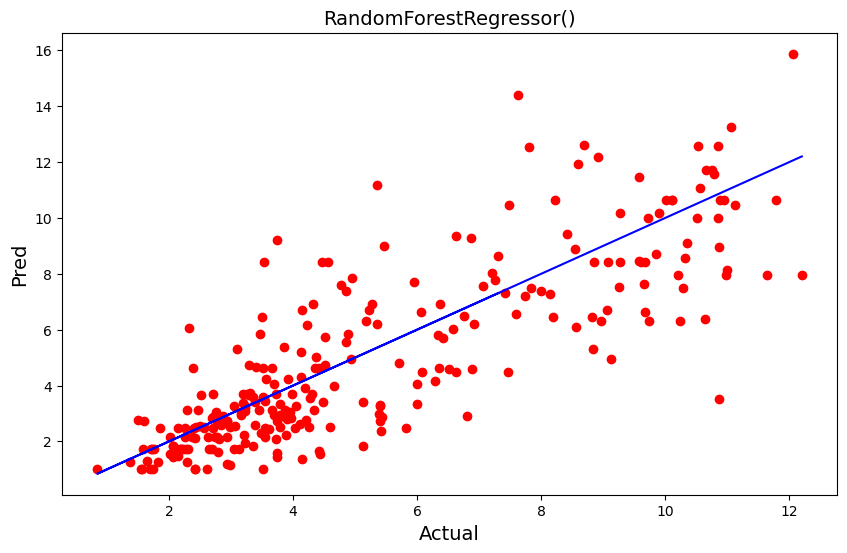

Cross Validation of:   RandomForestRegressor()  is 
[0.59501971 0.63564176 0.57827666 0.59842897 0.66221446]
0.6139163102310903
Diff in Acc Score and Cross Val Score is -  5.661427672475472


R2_score:   DecisionTreeRegressor()  is  0.44505442629160774
R2_score_Training Data:   DecisionTreeRegressor()  is  99.99163549820149
error:
Mean Absolute error 1.6291251414588348
Mean Squared error 5.721019189190485
Root Mean Squared error 2.3918652113341348


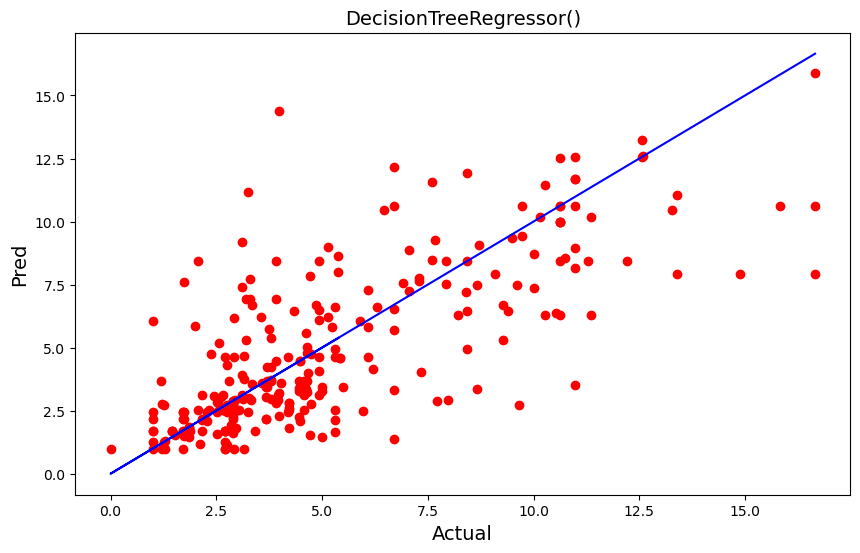

Cross Validation of:   DecisionTreeRegressor()  is 
[0.27381509 0.2466315  0.32182417 0.16650503 0.61632746]
0.3250206490706623
Diff in Acc Score and Cross Val Score is -  12.003377722094545


R2_score:   KNeighborsRegressor()  is  0.5111123327312539
R2_score_Training Data:   KNeighborsRegressor()  is  71.59166772660109
error:
Mean Absolute error 1.6023391193271153
Mean Squared error 5.040018081616015
Root Mean Squared error 2.244998459156713


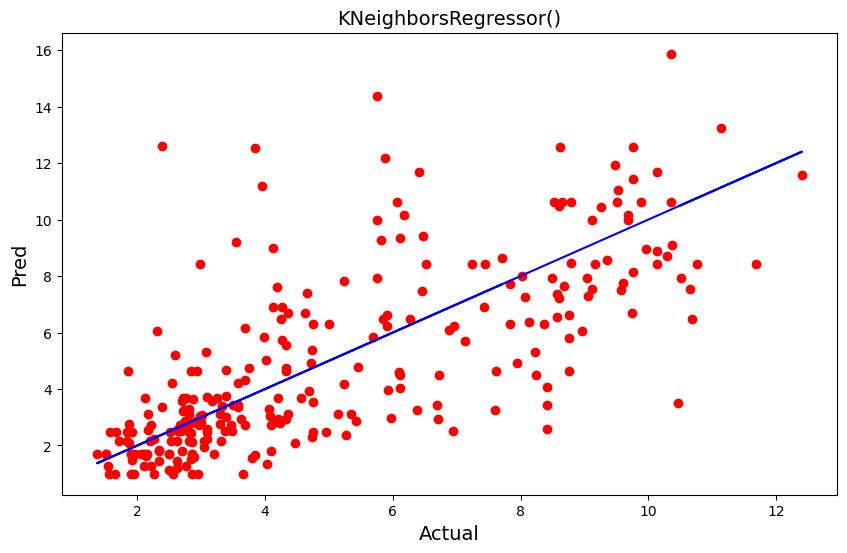

Cross Validation of:   KNeighborsRegressor()  is 
[0.53816266 0.50768104 0.50569997 0.53927453 0.58565069]
0.535293775745314
Diff in Acc Score and Cross Val Score is -  -2.418144301406011


R2_score:   Lasso()  is  0.23309873326730612
R2_score_Training Data:   Lasso()  is  19.735663063884402
error:
Mean Absolute error 2.3351151323532364
Mean Squared error 7.906102996503426
Root Mean Squared error 2.811779329268822


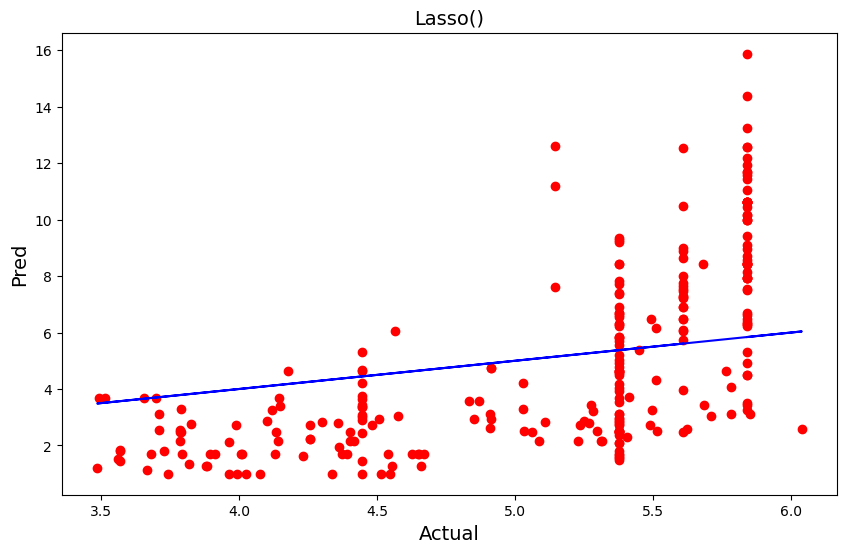

Cross Validation of:   Lasso()  is 
[0.21326732 0.22726042 0.19070474 0.18807398 0.23722923]
0.2113071385537048
Diff in Acc Score and Cross Val Score is -  2.1791594713601317


R2_score:   Ridge()  is  0.4432918361724413
R2_score_Training Data:   Ridge()  is  37.24859158806253
error:
Mean Absolute error 1.8427463789037537
Mean Squared error 5.739190001558705
Root Mean Squared error 2.395660660769531


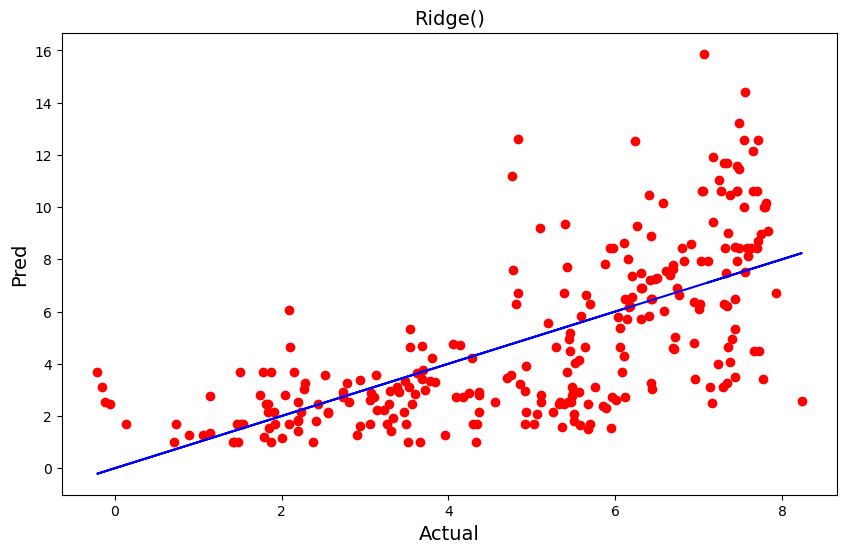

Cross Validation of:   Ridge()  is 
[0.35226039 0.34865427 0.33549362 0.38596032 0.42708368]
0.36989045514659324
Diff in Acc Score and Cross Val Score is -  7.340138102584803


R2_score:   SVR()  is  0.5246786424626169
R2_score_Training Data:   SVR()  is  53.796814660816025
error:
Mean Absolute error 1.5855794766341516
Mean Squared error 4.9001609100721755
Root Mean Squared error 2.2136307076999486


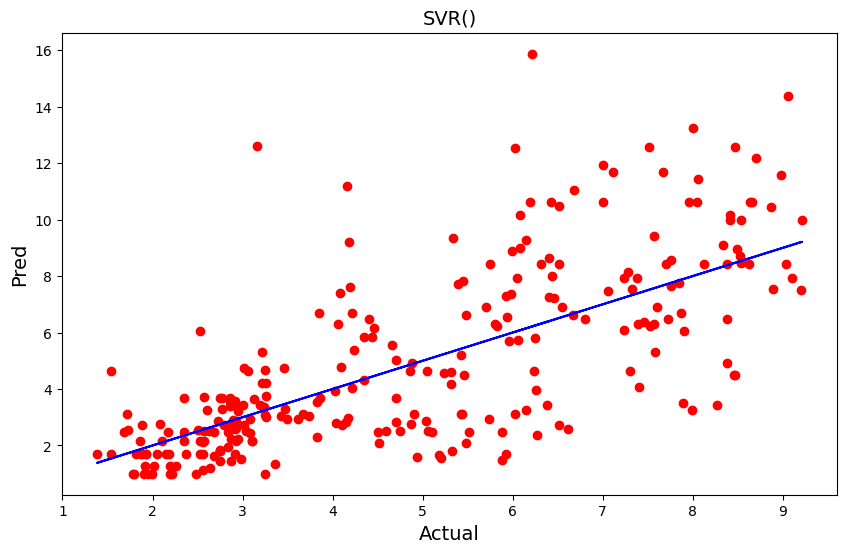

Cross Validation of:   SVR()  is 
[0.50021633 0.5253309  0.4410204  0.54215206 0.5244743 ]
0.5066387949125243
Diff in Acc Score and Cross Val Score is -  1.803984755009258


R2_score:   ExtraTreesRegressor()  is  0.6350363274689363
R2_score_Training Data:   ExtraTreesRegressor()  is  99.99163549820149
error:
Mean Absolute error 1.380988831084946
Mean Squared error 3.7624665783978526
Root Mean Squared error 1.9397078590338939


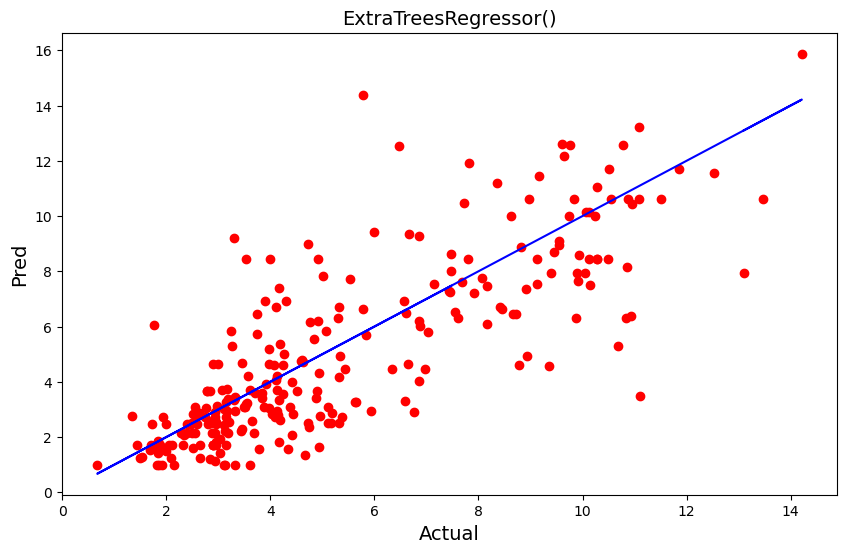

Cross Validation of:   ExtraTreesRegressor()  is 
[0.63139118 0.63433752 0.6254929  0.60552277 0.66921546]
0.6331919659246126
Diff in Acc Score and Cross Val Score is -  0.18443615443237693




In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

# ExtraTreesRegressor is the best model with least error

# 5. Hyper Parameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(ExtraTreesRegressor(),parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)

{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [101]:
Final_model = ExtraTreesRegressor(bootstrap = False, max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

65.61792933104329
R2_score: 0.6561792933104329
Mean Absolute error 1.359088158262155
Mean Squared error 3.5445004948280765
Root Mean Squared error 1.8826843853466455


# Saving the Model

In [102]:
import joblib # save as *.pkl
joblib.dump(Final_model,"Phase2-project_11_database_IND_Project.pkl")

['Phase2-project_11_database_IND_Project.pkl']